### checking for correlation in feature list

In [1]:
#importing packages
#libraries and functions
import patientFunctions as ptFn
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches

In [3]:
#directory management
#updates to directory management
machine_directory = 'C:/Users/mcremer' #the C and path to the project folder
# machine_directory = 'C:/Users/maega' #when working from home machine
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

folderNameHeader = "FeatCorrelation"
folderNameCommon = '_descFits'
folderNameSuffix = "_250224"

fileNameHeader = "FeatCorrelation"
fileNameCommon = '_descFits'
fileNameSuffix = "_250224"

folder_data_out = ptFn.makeFolderPathForData(parent_dir=parent_dir, folderName_header=folderNameHeader,
                                        folderName_common=folderNameCommon, folderName_suffix=folderNameSuffix)


In [4]:
#import data from DF for SVM
storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2/020_construction of data frames' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory, "DFsForSVM_CompLabswoEcho_exG01J01_MDfits_20241022_v1")

parent_dir = path
os.chdir(parent_dir)

#importing features used in SVM
model_features = pd.read_excel("AL-KnownPts_CompLabs_descFits_241022.xlsx", sheet_name = "ALL", header = [0])
# features_across_models= model_features



storage_directory = 'UFL Dropbox/Maegan Cremer/research-share/Maegan/Projects' #Local, HPG, or dropbox
project_directory = 'Cardiac-Amyloidosis-Multiple-Myeloma' #project folder
project_lv2_directory = '014_Mistic2' #deeper part of project folder

path = os.path.join(machine_directory, storage_directory, 
                    project_directory, project_lv2_directory)

parent_dir = path

# creating correlation matrix

In [12]:
#creating correlation matrix
#dropping the first column
feature_list_forCor = model_features.drop(model_features.columns[0], axis= 1)
feature_correlation = feature_list_forCor.corr()

In [ ]:

#exporting the correlation matrix
ptFn.outputToExcel(df_data = feature_correlation, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="correlation matrix")


In [43]:
feat_corr_sig_allpts = pd.concat([feature_correlation[feature_correlation["total CO2 Result Exp coef"]>=0.5]["total CO2 Result Exp coef"], 
           feature_correlation[feature_correlation["total CO2 Result Exp coef"]<=-0.5]["total CO2 Result Exp coef"]], axis = 0)

ptFn.outputToExcel(df_data = feat_corr_sig_allpts, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="correlation matrix sig")

print("The significant correlated features with CO2 exp coef are: \n", 
      feat_corr_sig_allpts)

The significant correlated features with CO2 exp coef are: 
 Neutrophil Result Desc min                 0.509494
Hemoglobin Result Linear coef              0.514937
total CO2 Result Linear coef               0.990102
Hemoglobin Result Exp coef                 0.519317
total CO2 Result Exp coef                  1.000000
Neutrophil Result Linear residual error   -0.543168
WBC Result(k/uL) Linear residual error    -0.515487
Creatinine Result(mg/dL) Exp coef         -0.550255
Name: total CO2 Result Exp coef, dtype: float64


In [51]:
type(feat_corr_sig_allpts.to_frame())

pandas.core.frame.DataFrame

Text(0.5, 1.0, 'Feature Correlation with CO2 Exp Coef for all patients')

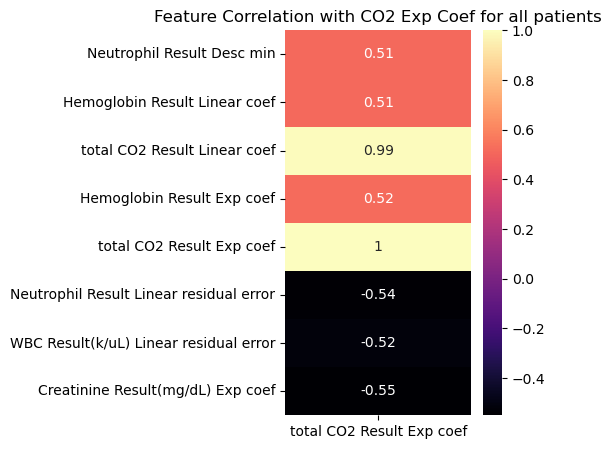

In [94]:
fig, ax = plt.subplots(figsize= (3,5))
sns.heatmap(feat_corr_sig_allpts.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with CO2 Exp Coef for all patients")

In [44]:
#correlation by amyloid status

#slice data to rows with amyloid positive
features_ALpositive = feature_list_forCor[feature_list_forCor["Amyloid Status_yes"] == 1]
#run correlation and save data
features_ALpositive_corr = features_ALpositive.corr()
ptFn.outputToExcel(df_data = features_ALpositive_corr, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr AL positive")

#slice data for amyloid negative
features_ALneg = feature_list_forCor[feature_list_forCor["Amyloid Status_yes"] == 0]
#run correlation and save data
features_ALneg_corr = features_ALneg.corr()
ptFn.outputToExcel(df_data = features_ALneg_corr, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr AL neg")


In [45]:
feat_corr_sig_ALpos = pd.concat([features_ALpositive_corr[features_ALpositive_corr["total CO2 Result Exp coef"]>=0.5]["total CO2 Result Exp coef"], 
           features_ALpositive_corr[features_ALpositive_corr["total CO2 Result Exp coef"]<=-0.5]["total CO2 Result Exp coef"]], axis = 0)

ptFn.outputToExcel(df_data = feat_corr_sig_ALpos, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix AL pos sig")

print("The significant correlated features with CO2 exp coef are: \n", 
      feat_corr_sig_ALpos)

The significant correlated features with CO2 exp coef are: 
 Neutrophil Result Desc 25%                      0.502401
Serum Electrophoresis Beta Result Desc min      0.564894
WBC Result(k/uL) Desc 25%                       0.515971
Pct. Neutrophil Result Linear R2                0.617164
total CO2 Result Linear coef                    0.987610
Pct. Neutrophil Result Exp R2                   0.608163
total CO2 Result Exp coef                       1.000000
Serum Electrophoresis Gamma Result Desc mean   -0.533711
Serum Electrophoresis Gamma Result Desc 75%    -0.522224
Chloride Result(mmol/L) Linear R2              -0.522031
Albumin Result(gm/dL) Exp coef                 -0.505874
Chloride Result(mmol/L) Exp R2                 -0.517772
Karnofsky Performance Status Desc mean         -0.552053
Karnofsky Performance Status Desc min          -0.577004
Karnofsky Performance Status Desc 50%          -0.508164
Karnofsky Performance Status Desc max          -0.526737
Name: total CO2 Result Exp 

Text(0.5, 1.0, 'Feature Correlation for AL positive pts')

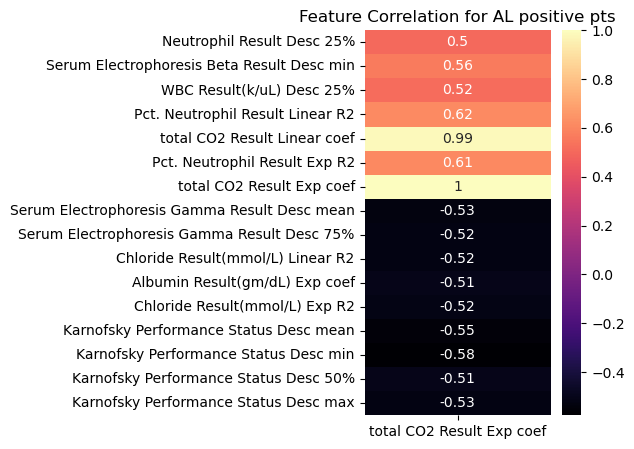

In [93]:
fig, ax = plt.subplots(figsize= (3,5))
sns.heatmap(feat_corr_sig_ALpos.to_frame(), cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation for AL positive pts")

In [46]:
feat_corr_sig_ALneg = pd.concat([features_ALneg_corr[features_ALneg_corr["total CO2 Result Exp coef"]>=0.5]["total CO2 Result Exp coef"], 
           features_ALneg_corr[features_ALneg_corr["total CO2 Result Exp coef"]<=-0.5]["total CO2 Result Exp coef"]], axis = 0)

ptFn.outputToExcel(df_data = feat_corr_sig_ALneg, fileName_header= fileNameHeader, fileName_Common= fileNameCommon + "stats_", fileName_suffix= fileNameSuffix,
        parent_dir= parent_dir, folderName=folder_data_out, sheetName="corr matrix AL pos sig")

print("The significant correlated features with CO2 exp coef are: \n", 
      feat_corr_sig_ALneg)

The significant correlated features with CO2 exp coef are: 
 Albumin Result(gm/dL) Desc 25%                           0.518317
Kappa Free Light Chains Result (mg/L) Desc min           0.547041
Platelet Count Result(k/uL) Desc 50%                     0.508078
Sodium Result(mmol/L) Desc min                           0.519103
Total Serum Protein Result Desc min                      0.525525
Total Serum Protein Result Desc 25%                      0.545802
total CO2 Result Desc min                                0.501449
HCT Result Linear coef                                   0.773078
Hemoglobin Result Linear coef                            0.801745
Platelet Count Result(k/uL) Linear coef                  0.590319
RBC Result Linear coef                                   0.762475
total CO2 Result Linear coef                             0.995697
Albumin Electrophoresis Result Exp intercpet             0.540563
Albumin Result(gm/dL) Exp intercpet                      0.520610
HCT Result Exp 

Text(0.5, 1.0, 'Feature Correlation with CO2 Exp Coef for AL Negative Pts')

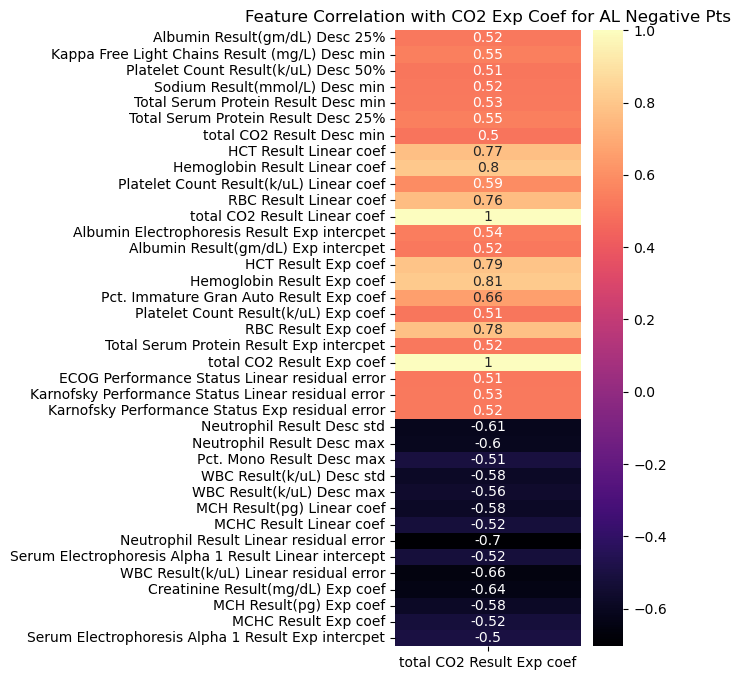

In [95]:
fig, ax = plt.subplots(figsize= (3,8))
sns.heatmap(feat_corr_sig_ALneg.to_frame(), cmap= "magma", annot = True, ax=ax)
ax.set_title("Feature Correlation with CO2 Exp Coef for AL Negative Pts")

In [ ]:
feat_corr_sig_concat = pd.concat([feat_corr_sig_allpts,feat_corr_sig_ALpos,feat_corr_sig_ALneg], axis = 1)

In [83]:
feat_corr_sig_concat.columns = ['all pts', 'AL positive', 'AL negative']

In [84]:
feat_corr_sig_concat.columns

Index(['all pts', 'AL positive', 'AL negative'], dtype='object')

Text(0.5, 1.0, 'Feature Correlation with CO2 Exp Coef')

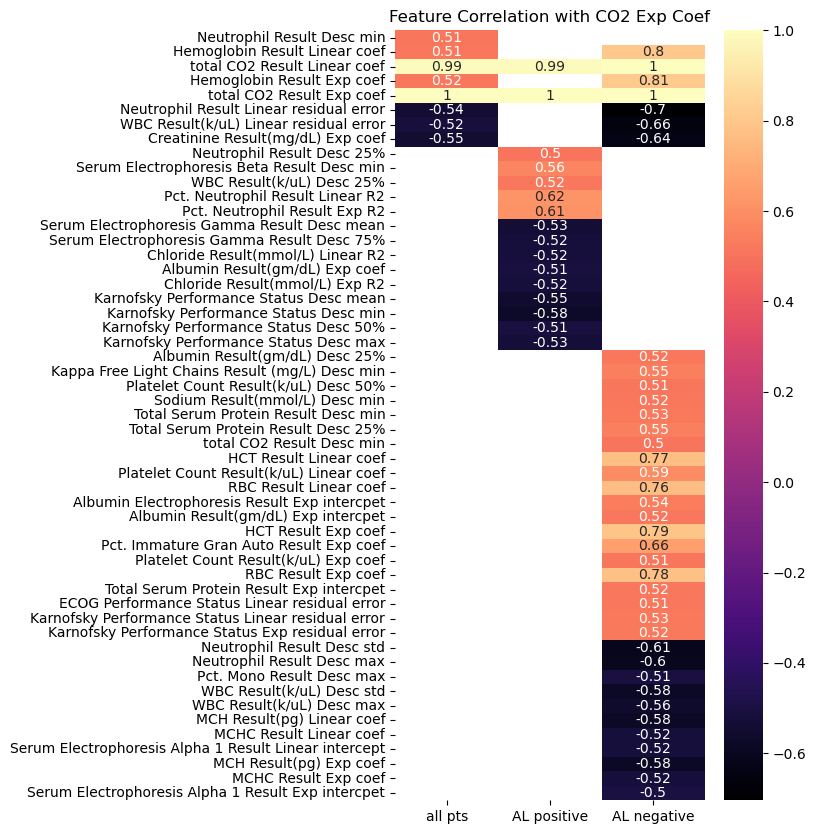

In [96]:
fig, ax = plt.subplots(figsize= (5,10))
sns.heatmap(feat_corr_sig_concat, cmap= "magma", annot = True, ax = ax)
ax.set_title("Feature Correlation with CO2 Exp Coef")